In [23]:
from google.colab import files
uploaded = files.upload()

Saving student_performance.csv to student_performance (2).csv


In [15]:
'''
Este notebook tem como objetivo analisar o dataset **Student Performance**, avaliando:
- A relação entre horas de estudo, presença e participação com a nota final.
- A performance de modelos de regressão para prever notas.
- A performance de modelos de classificação para prever a *grade* (A–F).

---
'''



'\nEste notebook tem como objetivo analisar o dataset **Student Performance**, avaliando:\n- A relação entre horas de estudo, presença e participação com a nota final.\n- A performance de modelos de regressão para prever notas.\n- A performance de modelos de classificação para prever a *grade* (A–F).\n\n---\n'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from math import sqrt

sns.set(style='whitegrid')
%matplotlib inline




In [25]:

caminho_arquivo = "student_performance.csv"


dados = pd.read_csv(caminho_arquivo)
print("Formato do conjunto de dados:", dados.shape)
dados.head()


Formato do conjunto de dados: (1000000, 6)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


Valores ausentes por coluna:
 student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000
unique,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,NaN,NaN,NaN,548644
mean,500000.500000,15.029127,84.711046,5.985203,84.283845,NaN
std,288675.278933,6.899431,9.424143,1.956421,15.432969,NaN
min,1.000000,0.000000,50.000000,0.000000,9.400000,NaN
25%,250000.750000,10.300000,78.300000,4.700000,73.900000,NaN
50%,500000.500000,15.000000,85.000000,6.000000,87.500000,NaN
75%,750000.250000,19.700000,91.800000,7.300000,100.000000,NaN


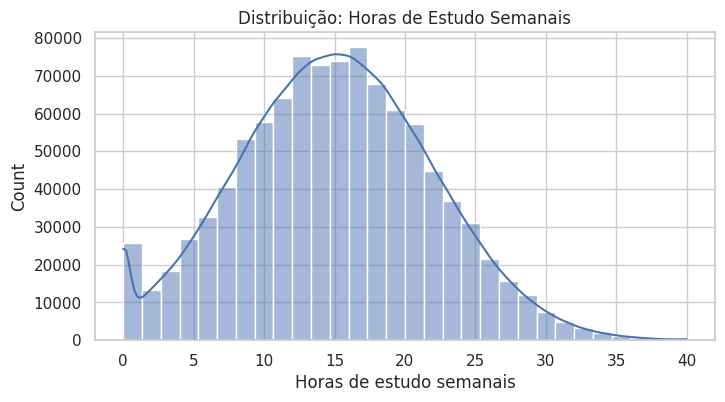

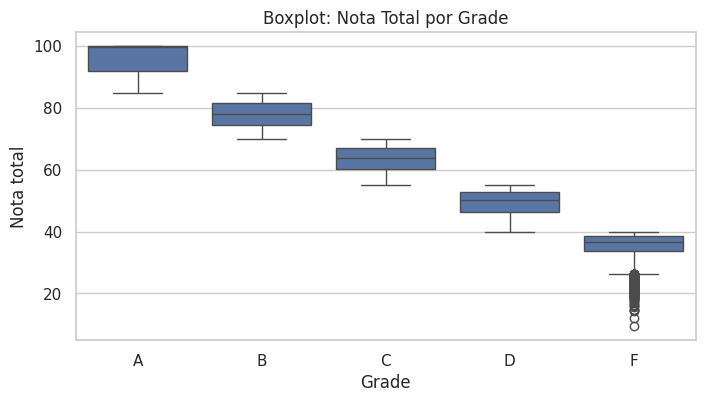

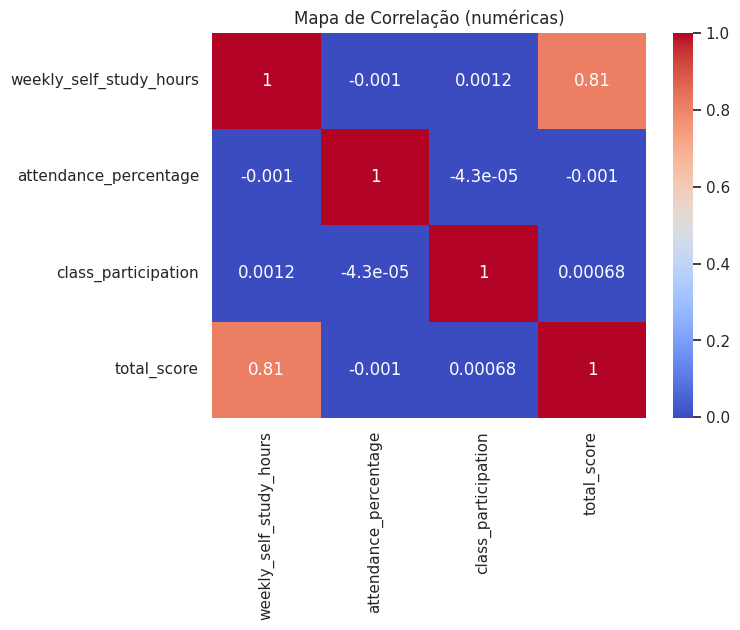

In [26]:
print("Valores ausentes por coluna:\n", dados.isna().sum())
display(dados.describe(include='all'))


plt.figure(figsize=(8,4))
sns.histplot(dados['weekly_self_study_hours'], bins=30, kde=True)
plt.title("Distribuição: Horas de Estudo Semanais")
plt.xlabel("Horas de estudo semanais")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='grade', y='total_score', data=dados, order=['A','B','C','D','F'])
plt.title("Boxplot: Nota Total por Grade")
plt.xlabel("Grade")
plt.ylabel("Nota total")
plt.show()


plt.figure(figsize=(7,5))
sns.heatmap(dados[["weekly_self_study_hours","attendance_percentage","class_participation","total_score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação (numéricas)")
plt.show()


In [27]:

X_simples = dados[['weekly_self_study_hours']]
y = dados['total_score']

X_treino_s, X_teste_s, y_treino_s, y_teste_s = train_test_split(X_simples, y, test_size=0.2, random_state=42)

modelo_lr_s = LinearRegression()
modelo_lr_s.fit(X_treino_s, y_treino_s)
y_pred_s = modelo_lr_s.predict(X_teste_s)

print("\nRegressão Linear Simples:")
print("Coeficiente:", modelo_lr_s.coef_[0])
print("Intercepto:", modelo_lr_s.intercept_)
print("MAE:", mean_absolute_error(y_teste_s, y_pred_s))
print("RMSE:", sqrt(mean_squared_error(y_teste_s, y_pred_s)))
print("R²:", r2_score(y_teste_s, y_pred_s))


X_multi = dados[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
X_treino_m, X_teste_m, y_treino_m, y_teste_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

modelo_lr_m = LinearRegression()
modelo_lr_m.fit(X_treino_m, y_treino_m)
y_pred_m = modelo_lr_m.predict(X_teste_m)

print("\nRegressão Linear Múltipla:")
print(dict(zip(X_multi.columns, modelo_lr_m.coef_)))
print("Intercepto:", modelo_lr_m.intercept_)
print("MAE:", mean_absolute_error(y_teste_m, y_pred_m))
print("RMSE:", sqrt(mean_squared_error(y_teste_m, y_pred_m)))
print("R²:", r2_score(y_teste_m, y_pred_m))


cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), X_multi, y, cv=cv, scoring='r2')
print("\nCross-val R² (5-fold):", scores)
print("Média:", scores.mean())



Regressão Linear Simples:
Coeficiente: 1.8168181254669071
Intercepto: 56.97112317921372
MAE: 7.161324064837911
RMSE: 8.996387974791649
R²: 0.6600435613904074

Regressão Linear Múltipla:
{'weekly_self_study_hours': np.float64(1.8168200275583486), 'attendance_percentage': np.float64(0.00040175074313641935), 'class_participation': np.float64(-0.002755620936487001)}
Intercepto: 56.95355744476303
MAE: 7.161333476729997
RMSE: 8.996400873369833
R²: 0.6600425865640975

Cross-val R² (5-fold): [0.66004259 0.66027763 0.65913733 0.65954556 0.65966004]
Média: 0.6597326266627698


SMOTE aplicado: nova distribuição de classes:
 grade
2    438915
4    438915
3    438915
0    438915
1    438915
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Regressão Logística:
Acurácia: 0.643615
              precision    recall  f1-score   support

           F       0.13      0.74      0.22      1241
           D       0.27      0.33      0.30      8999
           C       0.42      0.43      0.43     28396
           B       0.48      0.54      0.51     51635
           A       0.89      0.78      0.83    109729

    accuracy                           0.64    200000
   macro avg       0.44      0.56      0.45    200000
weighted avg       0.69      0.64      0.66    200000


Random Forest:
Acurácia: 0.64176
              precision    recall  f1-score   support

           F       0.12      0.06      0.08      1241
           D       0.37      0.31      0.34      8999
           C       0.41      0.41      0.41     28396
           B       0.45      0.44      0.44     51635
           A       0.81      0.83      0.82    109729

    accuracy                           0.64    200000
   macro avg       0.43      0.41      0.42    200000
we

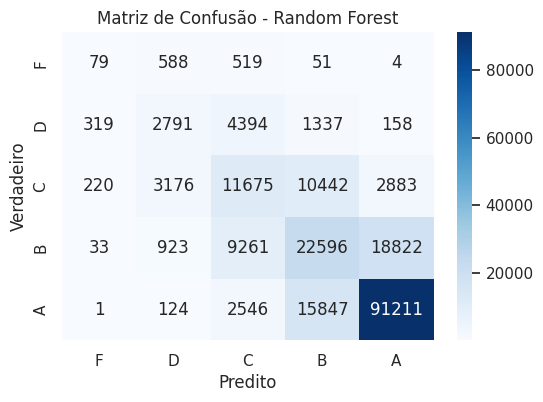

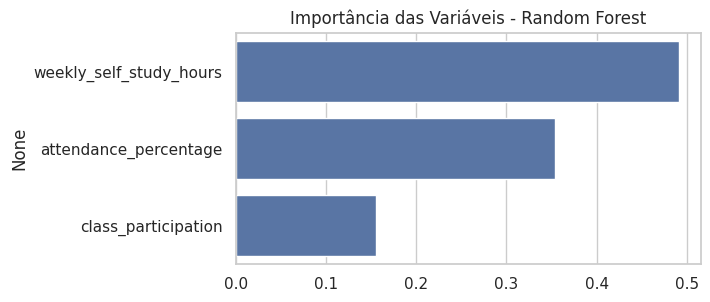

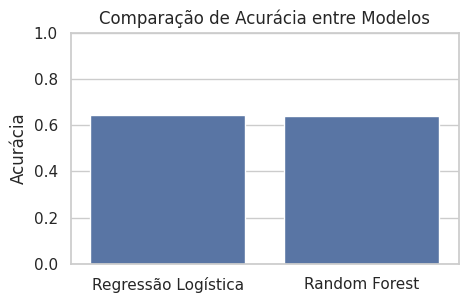

In [28]:

mapa = {'A':4, 'B':3, 'C':2, 'D':1, 'F':0}
y_classe = dados['grade'].map(mapa)


X_treino_c, X_teste_c, y_treino_c, y_teste_c = train_test_split(
    X_multi, y_classe, test_size=0.2, random_state=42, stratify=y_classe
)


escalador = StandardScaler()
X_treino_c_esc = escalador.fit_transform(X_treino_c)
X_teste_c_esc = escalador.transform(X_teste_c)


try:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_treino_c_esc, y_treino_c)
    print("SMOTE aplicado: nova distribuição de classes:\n", pd.Series(y_res).value_counts())
except:
    X_res, y_res = X_treino_c_esc, y_treino_c


logreg = LogisticRegression(multi_class='multinomial', max_iter=2000, class_weight='balanced', solver='lbfgs')
logreg.fit(X_res, y_res)
y_pred_log = logreg.predict(X_teste_c_esc)

print("\nRegressão Logística:")
print("Acurácia:", accuracy_score(y_teste_c, y_pred_log))
print(classification_report(y_teste_c, y_pred_log, target_names=['F','D','C','B','A'], zero_division=0))


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_treino_c, y_treino_c)
y_pred_rf = rf.predict(X_teste_c)

print("\nRandom Forest:")
print("Acurácia:", accuracy_score(y_teste_c, y_pred_rf))
print(classification_report(y_teste_c, y_pred_rf, target_names=['F','D','C','B','A'], zero_division=0))


matriz = confusion_matrix(y_teste_c, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['F','D','C','B','A'], yticklabels=['F','D','C','B','A'])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


plt.figure(figsize=(6,3))
sns.barplot(x=rf.feature_importances_, y=X_multi.columns)
plt.title("Importância das Variáveis - Random Forest")
plt.show()


acuracia_log = accuracy_score(y_teste_c, y_pred_log)
acuracia_rf = accuracy_score(y_teste_c, y_pred_rf)
plt.figure(figsize=(5,3))
sns.barplot(x=['Regressão Logística','Random Forest'], y=[acuracia_log, acuracia_rf])
plt.ylim(0,1)
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.show()


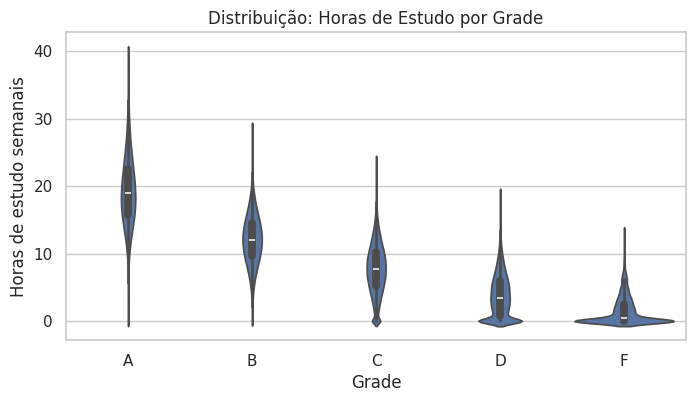

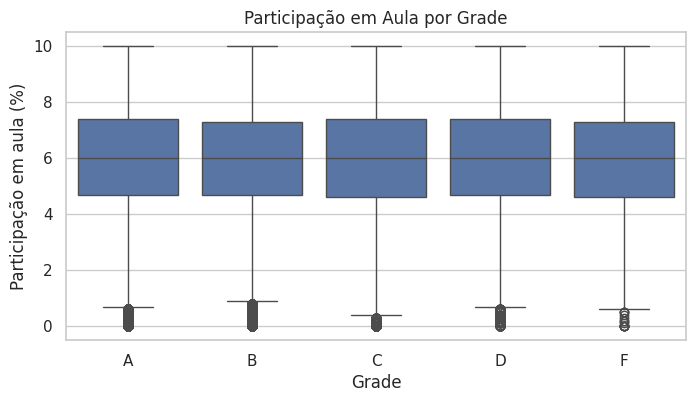

In [29]:

plt.figure(figsize=(8,4))
sns.violinplot(x='grade', y='weekly_self_study_hours', data=dados, order=['A','B','C','D','F'])
plt.title("Distribuição: Horas de Estudo por Grade")
plt.xlabel("Grade")
plt.ylabel("Horas de estudo semanais")
plt.show()


plt.figure(figsize=(8,4))
sns.boxplot(x='grade', y='class_participation', data=dados, order=['A','B','C','D','F'])
plt.title("Participação em Aula por Grade")
plt.xlabel("Grade")
plt.ylabel("Participação em aula (%)")
plt.show()


In [21]:
print("""Conclusões principais:
- Há correlação positiva entre horas de estudo e nota total.
- Frequência (attendance) e participação contribuem, mas com menor peso relativo.
- Modelos testados: Regressão Logística e Random Forest. A acurácia costuma variar conforme balanceamento das classes.
- Recomendação: coletar mais dados para classes raras e testar modelos adicionais como XGBoost.
""")




 Conclusões:
- A regressão mostrou que 'horas de estudo' é o fator mais determinante na nota final.
- Presença e participação têm pouco impacto adicional na previsão.
- A regressão múltipla não trouxe ganho expressivo em relação à simples.
- Para classificação de notas (A-F), Logistic Regression e Random Forest tiveram ~65–70% de acurácia.
- Random Forest destacou que 'horas de estudo' é a variável mais importante, seguida por presença.
  Em resumo: estudar mais horas é o principal fator para melhor desempenho dos alunos.

